# South East Michigan Crash Dataset: Hypothesis Testing

The South East Michigan Traffic Crash Dataset is available on below website:

https://maps-semcog.opendata.arcgis.com/

The multi year dataset on Traffic Dataset has various information like Time Of Accident, Location, Injury, Distraction, DUI and others. My goal was to find any meaningful pattern from the dataset. I could see some clear patterns as I will be describing below but the problem I faced is define a Hypothesis which could be proved.

My initial try was finding a pattern and ask a questiion about Alchol and its relationship with accidents. However I could not ask any question which data could have answered (well, may be only question we could ask is when we could find DUI cases which I think has a clear winner that is after 10 pm)

My next try was in general to find any pattern in Crashes, overall.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [14]:
#Read Crash Location From Spreadsheet.
crashLoc2011 = pd.read_csv('input/2011_Crash_Locations.csv')
crashLoc2012 = pd.read_csv('input/2012_Crash_Locations.csv')
crashLoc2013 = pd.read_csv('input/2013_Crash_Locations.csv')
crashLoc2014 = pd.read_csv('input/2014_Crash_Locations.csv')
crashLoc2015 = pd.read_csv('input/2015_Crash_Locations.csv')
crashLoc2016 = pd.read_csv('input/2016_Crash_Locations.csv')

In [99]:
crashLoc2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124421 entries, 0 to 124420
Data columns (total 46 columns):
X             124421 non-null float64
Y             124421 non-null float64
FID           124421 non-null int64
OBJECTID      124421 non-null int64
acount        124421 non-null int64
alcohol       124421 non-null int64
bcount        124421 non-null int64
bicycle       124421 non-null int64
ccount        124421 non-null int64
crashid       124421 non-null int64
crashtypeo    124421 non-null int64
datetime      124421 non-null object
deer          124421 non-null int64
dis_ctrl_i    124421 non-null int64
drug          124421 non-null int64
elderly       124421 non-null int64
high_sever    124421 non-null int64
hitnrun       124421 non-null int64
hour          124421 non-null int64
hwy_clss_c    124421 non-null int64
interroad     124421 non-null object
juris         124421 non-null int64
kcount        124421 non-null int64
lanedepart    124421 non-null int64
lighting      12442

Below, the 2011 crash data is loaded. I have particularly selected weekday and hour of accident. I have enumarated the week day which was little different than the usual python works. 

/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


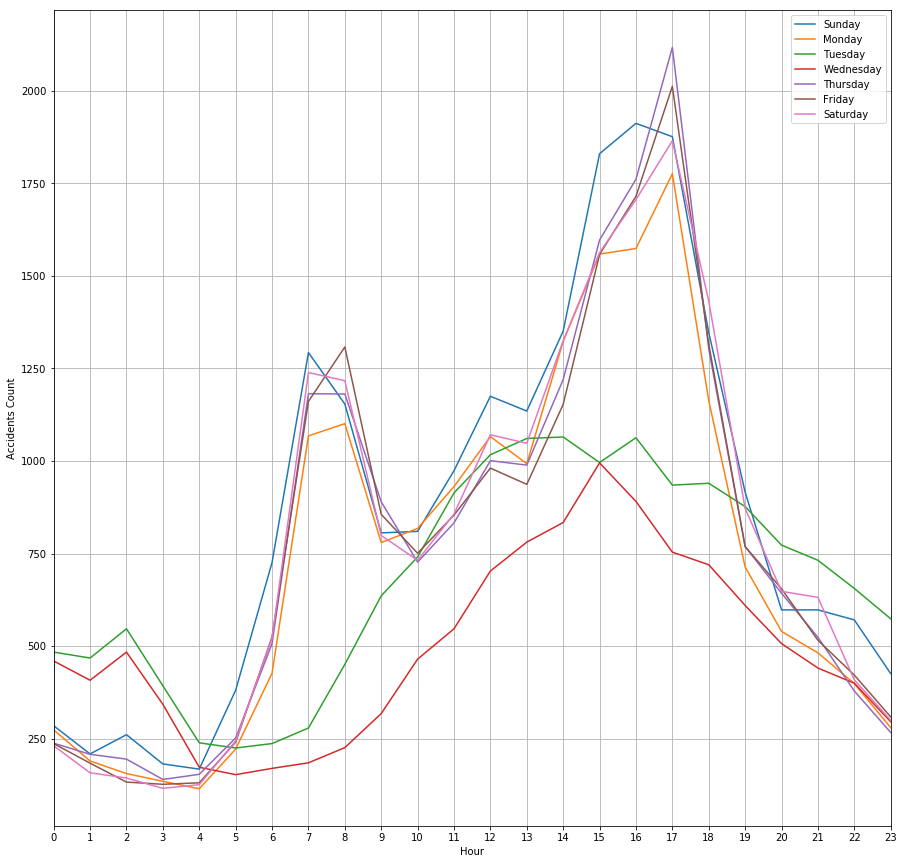

In [6]:
crash2011 = crashLoc2011[['hour','weekday']]
crash2011['dayofweek'] = pd.Series((n for n in crash2011.weekday), index=crash2011.index)

crash2011.loc[crash2011.dayofweek == 1, 'dayofweek'] = 'Sunday'
crash2011.loc[crash2011.dayofweek == 2, 'dayofweek'] = 'Monday'
crash2011.loc[crash2011.dayofweek == 3, 'dayofweek'] = 'Tuesday'
crash2011.loc[crash2011.dayofweek == 4, 'dayofweek'] = 'Wednesday'
crash2011.loc[crash2011.dayofweek == 5, 'dayofweek'] = 'Thursday'
crash2011.loc[crash2011.dayofweek == 6, 'dayofweek'] = 'Friday'
crash2011.loc[crash2011.dayofweek == 7, 'dayofweek'] = 'Saturday'

crash2011.set_index(['dayofweek','hour'], inplace=True)

grouped = crash2011.groupby(level=['dayofweek', 'hour']).size().reset_index(name='accidents')

ax = plt.subplot(111)
grouped[grouped.dayofweek.isin(['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])].groupby('dayofweek').plot(y='accidents', x='hour', kind='line',figsize=(15,15), ax=ax)
L = plt.legend()
_ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, ['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])]
_ = ax.set_xticks(grouped.hour.unique())
_ = ax.set_ylabel("Accidents Count")
_ = ax.set_xlabel("Hour")
_ = ax.set_xlabel("Hour")

# Defining Hypothesis 

From the above chart, it can be seen there three spikes - First at 7 AM, second at 8 AM and third is at 5 PM. Accidents on 5 Pm seems to be regular phenemenon.

Now on Thursday it seems to be many more accidents happened than rest of the week.

So the Alternate hypothesis, I want to formulate is :

Driving on thursday at 5 PM in South East Michigan may not be a good idea and could be risky

The Null hypothesis here is that there is no relationship in paricular with Thursday and chances of accident

